In [1]:
## Import file and Libraries

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.feature_selection import SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
## Reading the file
data = pd.read_csv("lease_renewal.csv", header = 0)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'lease_renewal.csv'

## Exploratory Data Analysis

 Lets get an understanding as to how the given attributes relate too the '*Renewed*' status.

In [ ]:
labels ='Renewed', "Not Renewed"

sizes = [data.Renewed[data['Renewed']==1].count(), data.Renewed[data['Renewed']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90, colors = None)

ax1.axis('equal')
plt.title("Renewed Lease and those who didn't Renew their Lease ", size = 25)
plt.show()

So only about **20%** of customers renewed thier lease 


### The Chi-Square Test of Independence

* The chi-square test of independence examines our observed data and tells us whether we have enough evidence to conclude beyond a reasonable doubt that **two categorical variables are related**.

* We will compare a feature category with the **Renewed** category


* In **feature selection**, we aim to select the features which are highly dependent on the response.


* When **two features are independent**, the observed count is close to the expected count, thus we will have **smaller Chi-Square value**. 


* So a **high Chi-Square Value** indicates that the **hypothesis of independence is incorrect**. In simple words, higher the Chi-Square value the *feature is more dependent* on the response and it *can be selected for model training*

### Steps for Chi-Squared Test for Feature Selection


**Step 1: Stating the Hypothesis**

* **Ho**: There is no relationship between the two categorical variables (with one being Renewed). (They are independent.)

* **Ha**: There is a relationship between the two categorical variables (with one being Renewed). (They are not independent.)


**Step 2: Build Contingency table**

* I will use the crosstab in the pandas library 

**Step 3: Find the Expected Values**

**Step 4: Calculate the Chi-Square Statistic**

**Step 5: Accept or Reject the Null Hypothesis**


#### Lets work on Step 2: Building the Contingency Table(s)

In [12]:
## No Rent Change Column
no_rent_change_crosstab = pd.crosstab(data["no_rent_change"], data["Renewed"], margins = True)
no_rent_change_crosstab

Renewed,0,1,All
no_rent_change,,,
0,51797,10372,62169
1,12411,5270,17681
All,64208,15642,79850


#### Heatmaps to visually see the Contingency Tables!

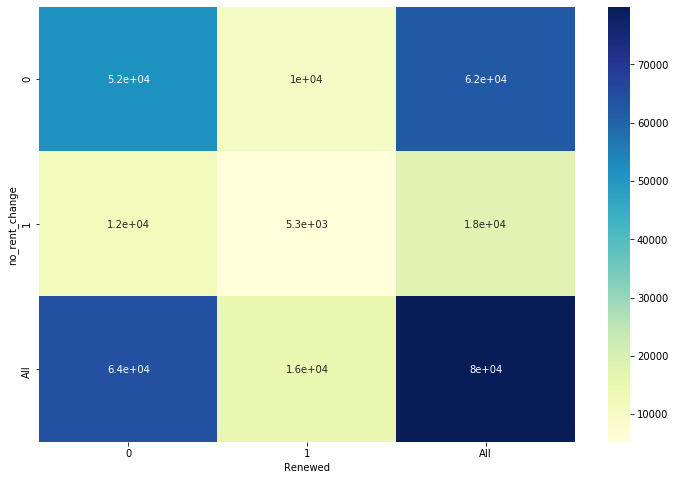

In [11]:
plt.figure(figsize=(12,8)) 
sns.heatmap(no_rent_change_crosstab, annot=True, cmap="YlGnBu")

In [13]:
## Rent Change at most 10%
rent_change_10_crosstab = pd.crosstab(data["rent_change_10"], data["Renewed"], margins = True)

## Rent Change by more than 10% but at most 20%
rent_change_20_crosstab = pd.crosstab(data["rent_change_20"], data["Renewed"], margins = True)

## Lease Lengths 
lease_length_1_crosstab = pd.crosstab(data["lease_length_1"], data["Renewed"], margins = True)
lease_length_2_crosstab = pd.crosstab(data["lease_length_2"], data["Renewed"], margins = True)
lease_length_3_crosstab = pd.crosstab(data["lease_length_3"], data["Renewed"], margins = True)


## Age Ranges
age_range_under_24_crosstab = pd.crosstab(data["age_range_under_24"], data["Renewed"], margins = True)

age_range_24_29_crosstab = pd.crosstab(data["age_range_24_29"], data["Renewed"], margins = True)

age_range_30_39_crosstab = pd.crosstab(data["age_range_30_39"], data["Renewed"], margins = True)

age_range_40_49_crosstab = pd.crosstab(data["age_range_40_49"], data["Renewed"], margins = True)

age_range_50_59_crosstab = pd.crosstab(data["age_range_50_59"], data["Renewed"], margins = True)

age_range_60_crosstab = pd.crosstab(data["age_range_60"], data["Renewed"], margins = True)

## Positive Survey

positive_survey_crosstab = pd.crosstab(data["PositiveSurvey"], data["Renewed"], margins = True)

## No Fines or Violations
no_fines_crosstab = pd.crosstab(data["NoFinesViolations"], data["Renewed"], margins = True)

## No Late Payments

late_payments_crosstab = pd.crosstab(data["LatePayments"], data["Renewed"], margins = True)

## If there's a mandatory HOA fee on the Lease

HOA_crosstab = pd.crosstab(data["HOA_mandatory"], data["Renewed"], margins = True)


In [ ]:
### Function for Calculating Chi-Squared, p value, df,

In [24]:
def categorical_dependency(crosstab_table):
    '''Pass Crosstab Table to function to check its dependency'''
    '''Use Chi2 from scipy library'''
    confidence_interval = 0.95
    
    chi_stat, p_value, degrees_of_freedom, expected = stats.chi2_contingency(crosstab_table)
    ## expected is just the cross table with expected values, no need to return it
    print ("Chi-Square Statistic value = {}".format(chi_stat))
    print ("P - Value = {}".format(p_value))
    alpha = 1.0 - confidence_interval ## Alpha will always be 0.05 in this case
    
    if p_value <= alpha:
        print('Dependent (reject H0)')
    else:  
         print('Independent (fail to reject H0)')
            
    return expected

In [29]:
## Pass in crosstab tables

## No Change in Rent
expected_table_1 = categorical_dependency(no_rent_change_crosstab)
print()
## Rent Changed by at most 10%
expected_table_2 = categorical_dependency(rent_change_10_crosstab)
print()

## Rent Changed by more than 10% and at most 20%
expected_table_3 = categorical_dependency(rent_change_20_crosstab)


Chi-Square Statistic value = 1504.8876490872017
P - Value = 0.0
Dependent (reject H0)

Chi-Square Statistic value = 48.930692575598414
P - Value = 6.036492920236767e-10
Dependent (reject H0)

Chi-Square Statistic value = 1306.5278738862546
P - Value = 1.278880430541224e-281
Dependent (reject H0)


In [34]:
## No Fines or Violations
expected_table_no_fines = categorical_dependency(no_fines_crosstab)
print()
## Check Late Payments
expected_table_late_payments = categorical_dependency(late_payments_crosstab)
print()
## Positive Survey
expected_table_positive = categorical_dependency(positive_survey_crosstab)
print()
## HOA Mandatory
expected_table_hoa = categorical_dependency(HOA_crosstab)

Chi-Square Statistic value = 1326.0077950161763
P - Value = 7.642517827117916e-286
Dependent (reject H0)

Chi-Square Statistic value = 299.20590173696974
P - Value = 1.607301843254518e-63
Dependent (reject H0)

Chi-Square Statistic value = 45.33823503369564
P - Value = 3.381500210083084e-09
Dependent (reject H0)

Chi-Square Statistic value = 597.4545295152955
P - Value = 5.509644429734212e-128
Dependent (reject H0)


In [33]:
## Check Lease Length
## The resident has lived for at most 1 year on the lease
expected_table_lease_length_1 = categorical_dependency(lease_length_1_crosstab)
print()
## The resident has lvied for more than 1 but at most 2 years on the lease
expected_table_lease_length_2 = categorical_dependency(lease_length_2_crosstab)
print()
## The resident has lived for more than 2 but at most 3 years on the lease
expected_table_lease_length_3 = categorical_dependency(lease_length_3_crosstab)


Chi-Square Statistic value = 642.7039427336928
P - Value = 8.849982606757292e-138
Dependent (reject H0)

Chi-Square Statistic value = 588.1097058703072
P - Value = 5.8009985313031116e-126
Dependent (reject H0)

Chi-Square Statistic value = 28.207873269281187
P - Value = 1.1319527565955887e-05
Dependent (reject H0)


In [37]:
## Now Lets Check the Age Ranges

## Under 24
expected_table_age_under_24 = categorical_dependency(age_range_under_24_crosstab)
print()
## 24 - 29
expected_table_age_20s = categorical_dependency(age_range_24_29_crosstab)
print()

## Age 30-39
expected_table_age_30 = categorical_dependency(age_range_30_39_crosstab)
print()

## Age 40 -49
expected_table_age_40 = categorical_dependency(age_range_40_49_crosstab)
print()

## Age 50- 59

expected_table_age_50 = categorical_dependency(age_range_50_59_crosstab)
print()

## Age 60+
expected_table_age_60 = categorical_dependency(age_range_60_crosstab)

Chi-Square Statistic value = 211.73508470787507
P - Value = 1.1250099538436605e-44
Dependent (reject H0)

Chi-Square Statistic value = 4.2438438244620205
P - Value = 0.37400986588335755
Independent (fail to reject H0)

Chi-Square Statistic value = 340.52232692570897
P - Value = 1.9506309724246455e-72
Dependent (reject H0)

Chi-Square Statistic value = 53.91518397498539
P - Value = 5.482344432478185e-11
Dependent (reject H0)

Chi-Square Statistic value = 14.290431145336019
P - Value = 0.006423546727277222
Dependent (reject H0)

Chi-Square Statistic value = 46.0963099210536
P - Value = 2.3517721567420323e-09
Dependent (reject H0)


We can see that we finally **failed to reject the H0** !

## Note: 

* We could have just used the Chi-Squared **Feature Selection** build right into **sklearn**

In [38]:
from sklearn.feature_selection import chi2

In [39]:
# Columns
X = data[["no_rent_change","rent_change_10","rent_change_20","lease_length_2","lease_length_3","lease_length_1","age_range_under_24","age_range_24_29","age_range_30_39","age_range_30_39","age_range_50_59","age_range_60","NoFinesViolations","PositiveSurvey","LatePayments","HOA_mandatory"]]

In [42]:
X.head()

,no_rent_change,rent_change_10,rent_change_20,lease_length_2,lease_length_3,lease_length_1,age_range_under_24,age_range_24_29,age_range_30_39,age_range_30_39,age_range_50_59,age_range_60,NoFinesViolations,PositiveSurvey,LatePayments,HOA_mandatory
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
y = data[["Renewed"]]

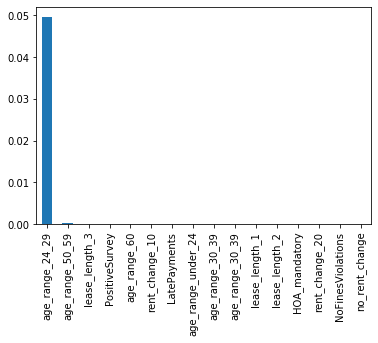

In [44]:
chi_scores = chi2(X,y)
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

**Note:** For our model training (in part 2) we will not use Age Range 24-29 since it is an independent feature

In [45]:
### Lets plot the Chi-Squared Values

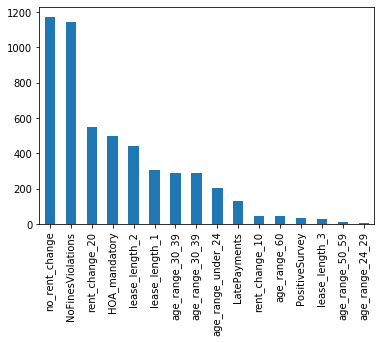

In [46]:
ch_values = pd.Series(chi_scores[0],index = X.columns)
ch_values.sort_values(ascending = False , inplace = True)
ch_values.plot.bar()

## We can Also look at the Heatmap 
* From the Heatmap we and see the important **Features**

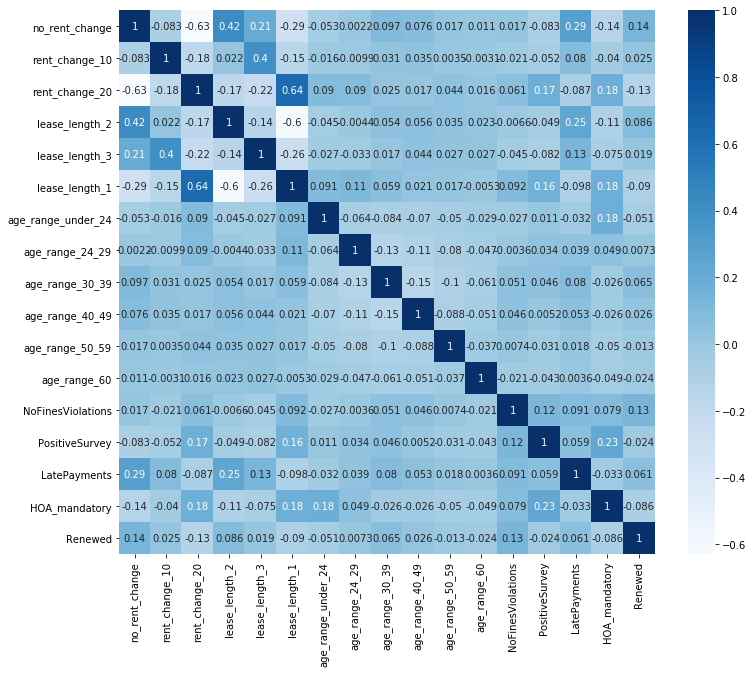

In [57]:
plt.figure(figsize=(12,10))
correlation = data.corr()
sns.heatmap(correlation, annot=True, cmap=plt.cm.Blues)
plt.show()

#### Lets find the Highly Correlated Features on this Heatmap

In [60]:
# First all the Features
correlation_target = abs(correlation["Renewed"])
correlation_target

no_rent_change        0.137282
rent_change_10        0.024754
rent_change_20        0.127915
lease_length_2        0.085821
lease_length_3        0.018795
lease_length_1        0.089716
age_range_under_24    0.051494
age_range_24_29       0.007290
age_range_30_39       0.065303
age_range_40_49       0.025985
age_range_50_59       0.013378
age_range_60          0.024027
NoFinesViolations     0.128865
PositiveSurvey        0.023828
LatePayments          0.061214
HOA_mandatory         0.086500
Renewed               1.000000
Name: Renewed, dtype: float64

Notice the **Highest** and the **Lowest** (age_range_24_29) correlated features

In [62]:
## Grab/print out the Highly Correlated Features
relevant_features = correlation_target[correlation_target>0.08]
relevant_features

no_rent_change       0.137282
rent_change_20       0.127915
lease_length_2       0.085821
lease_length_1       0.089716
NoFinesViolations    0.128865
HOA_mandatory        0.086500
Renewed              1.000000
Name: Renewed, dtype: float64

In [ ]:
##Next step : Putting it all together!!
